# Data pre-processing

In [394]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [395]:
from fastai.tabular.all import *
from fastai.metrics import * 
from sklearn.metrics import roc_auc_score 


path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')
#path = Path('/home/jupyter/fraud-detection-pytorch-scikit-fastai/data')

Path.BASE_PATH = path
pd.options.display.max_rows = 500
pd.options.display.max_columns = 300

In [396]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [397]:
train_ss.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
44771,3031771,0,1087364,117.00,W,12932,361.0,150.0,visa,226.0,debit,204.0,87.0,8.0,NaN,gmail.com,NaN,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,2.0,0.0,14.0,4.0,8.0,8.0,1.0,225.0,1.0,NaN,NaN,NaN,NaN,8.0,232.0,NaN,NaN,NaN,113.0,T,T,T,M0,F,F,F,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271831,3258831,0,6592563,22.96,C,5740,555.0,144.0,mastercard,224.0,credit,NaN,NaN,NaN,NaN,msn.com,msn.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN,-5.0,192686.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,102.0,15.0,340.0,474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 63.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
295064,3282064,0,7288908,24.50,W,7826,481.0,150.0,mastercard,224.0,debit,325.0,87.0,NaN,NaN,NaN,NaN,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,14.0,1.0,324.0,324.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,M1,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248994,3235994,0,5938446,100.00,R,11156,399.0,150.0,american express,223.0,credit,325.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,128724.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,529.0,549.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Mac OS X 10.10,firefox 57.0,24.0,1280x720,match_status:2,T,F,T,F,desktop,rv:57.0
22055,3009055,0,579537,250.00,R,15063,514.0,150.0,visa,226.0,credit,310.0,87.0,NaN,74.0,gmail.com,anonymous.com,3.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,142308.0,NaN,NaN,0.0,-8.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-420.0,New,NotFound,166.0,NaN,372.0,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Mac OS X 10_8_5,safari generic,24.0,2560x1440,match_status:2,T,F,F,F,desktop,MacOS


In [398]:
train_ss.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [399]:
# I had to do this so that the learner would automatically use FlattenedLoss of 
# CrossEntropyLoss() as the loss function. Leaving the dep_var as an int causes 
# FlattenedLoss of MSELoss() to be chosen.
train_ss['isFraud'] = train_ss['isFraud'].astype('category')

In [400]:
train_ss['isFraud']

44771     0
271831    0
295064    0
248994    0
22055     0
         ..
5077      0
253533    0
10973     0
380298    0
420843    0
Name: isFraud, Length: 59054, dtype: category
Categories (2, int64): [0, 1]

In [401]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [402]:
train_ss[cat].nunique()

ProductCD           5
card1            6185
card2             499
card3              73
card4               4
card5              77
card6               3
addr1             142
addr2              38
P_emaildomain      59
R_emaildomain      59
M1                  2
M2                  2
M3                  2
M4                  3
M5                  2
M6                  2
M7                  2
M8                  2
M9                  2
DeviceType          2
DeviceInfo        804
id_12               2
id_13              35
id_14              17
id_15               3
id_16               2
id_17              66
id_18              12
id_19             354
id_20             212
id_21             117
id_22              14
id_23               3
id_24               9
id_25             115
id_26              53
id_27               2
id_28               2
id_29               2
id_30              72
id_31             106
id_32               3
id_33             117
id_34               3
id_35     

There are a number of categorical variables where the number of categories has high cardinality, so deep learning might help us in this senerio.

In [403]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)
cut_off

12579507

In [404]:
cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [405]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(train_ss, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [406]:
(path/'to_nn.pkl').save(to_nn)

# NN without V*** features

In [3]:
to_nn = (path/'to_nn.pkl').load()

In [5]:
to_nn.items

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na
57195,-1.322806,0,-1.245707,1.240415,5,1233,390,30,4,70,3,68,21,-0.183705,-0.092442,3,0,-0.089028,-0.090942,-0.034647,-0.061955,-0.134384,-0.109859,-0.050231,-0.056906,-0.203488,-0.057582,-0.096037,-0.051114,-0.224706,-0.123058,2.468850,-0.280162,9.471498,1.122761,4.260183,-0.145077,-0.097696,-0.154975,0.113073,1.089056,-0.372027,-0.133032,-0.07686,-0.121596,0.805232,0,0,0,0,0,2,0,0,0,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,1,1,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
312877,0.506394,0,0.519150,-0.328971,5,3740,168,30,4,40,3,70,21,-0.200412,-0.092442,17,0,-0.068799,-0.079297,-0.034647,-0.061955,-0.174292,-0.097012,-0.050231,-0.056906,-0.203488,-0.057582,-0.096037,-0.051114,-0.150241,-0.085467,-0.590402,-0.280162,-0.233869,1.378097,2.774099,-0.145077,-0.097696,-0.154975,0.113073,1.751793,1.585534,-0.133032,-0.07686,-0.121596,1.033601,2,2,2,1,1,2,1,2,2,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,1,1,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
195195,-0.335527,1,-0.405201,-0.459771,5,1196,317,30,4,51,3,64,21,-0.212942,-0.092442,54,0,-0.095771,-0.085119,-0.034647,-0.061955,-0.214200,-0.109859,-0.050231,-0.056906,-0.141792,-0.057582,-0.086453,-0.051114,-0.180027,-0.141853,-0.259847,-0.634464,-0.404513,-0.318066,-0.391905,-0.145077,-0.097696,-0.154975,0.113073,-0.313342,-0.261222,-0.133032,-0.07686,-0.121596,-0.483425,2,2,2,1,2,1,1,2,2,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,1,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
21600,-1.577460,0,-1.448797,-0.481571,5,2236,94,30,3,57,3,6,21,-0.217119,-0.092442,0,0,-0.095771,-0.090942,-0.034647,-0.061955,-0.214200,-0.122707,-0.050231,-0.056906,-0.203488,-0.057582,-0.096037,-0.051114,-0.232152,-0.141853,-0.590402,-0.280162,-0.233869,-0.482211,-0.246527,-0.145077,-0.097696,-0.154975,0.113073,-0.615123,-0.637960,-0.133032,-0.07686,-0.121596,-0.760731,2,2,2,2,2,1,0,0,0,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
12253,-1.644330,0,-1.510049,-0.333549,5,3916,115,30,4,70,3,26,21,-0.104347,-0.092442,0,0,-0.089028,-0.085119,-0.034647,-0.061955,-0.094476,-0.109859,-0.050231,-0.056906,-0.141792,-0.057582,-0.076868,-0.051114,-0.105562,-0.123058,2.546627,2.700589,-0.255200,-0.482211,-0.246527,-0.145077,-0.097696,-0.154975,0.113073,2.242928,-0.372027,-0.133032,-0.07686,-0.121596,-0.499737,2,2,2,0,0,1,0,0,0,0.167473,-0.148303,-0.035881,0.027773,-0.153702,0.186117,-0.000152,0.018447,-0.031211,0.036798,0.117061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [4]:
dls = to_nn.dataloaders(1024)

In [5]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

Let's also use the ActivationStats callback to diagnose the condition of our neural network.

In [6]:
from fastai.callback.hook import *

In [23]:
tabular_learner?

In [28]:
learn = tabular_learner(dls, [500, 250], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

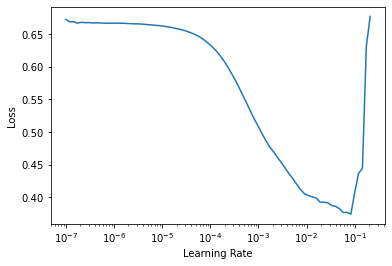

In [29]:
lr_min, lr_steep = learn.lr_find()

In [30]:
lr_min, lr_steep

(0.00831763744354248, 0.0005754399462603033)

In [31]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.260107,0.305726,0.965905,0.400000,0.005510,0.010870,0.720341,00:05
1,0.150259,0.136139,0.968153,0.623656,0.159780,0.254386,0.805321,00:05
2,0.107061,0.127867,0.963563,0.434343,0.236915,0.306595,0.811424,00:05
3,0.083093,0.127346,0.963001,0.421569,0.236915,0.303351,0.809176,00:05


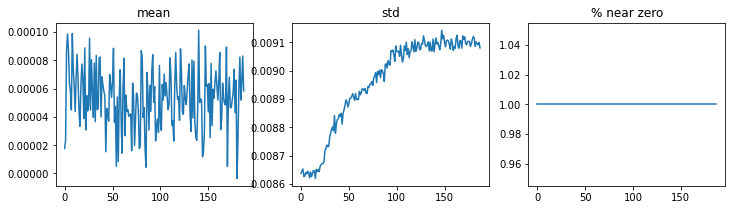

In [32]:
learn.activation_stats.plot_layer_stats(1)

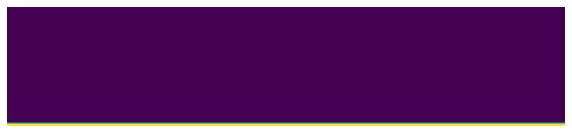

In [33]:
learn.activation_stats.color_dim(1)

(1.4454397387453355e-06, 1.0964781722577754e-06)

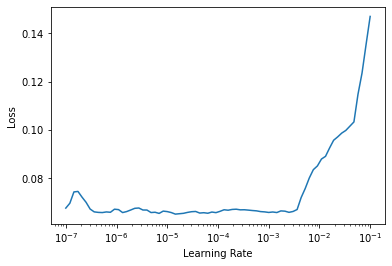

In [36]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [37]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.066253,0.127134,0.963750,0.436842,0.228650,0.300181,0.807679,00:05
1,0.066185,0.127167,0.964031,0.443243,0.225895,0.299270,0.806966,00:04
2,0.066150,0.127271,0.963563,0.430851,0.223140,0.294011,0.806968,00:04
3,0.065994,0.127208,0.964312,0.450549,0.225895,0.300917,0.806350,00:04


# NN with V*** features

In [6]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)
train_s['isFraud'] = train_s['isFraud'].astype('category')

In [11]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
       'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125',
       'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
       'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149',
       'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
       'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181',
       'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189',
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
       'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205',
       'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
       'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221',
       'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
       'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
       'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
       'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261',
       'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269',
       'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
       'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293',
       'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
       'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317',
       'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339'] 
dep_var='isFraud'

In [12]:
assert len(cat)+len(cont)==(len(train_s.columns)-1)

In [13]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_s['TransactionDT'].max() - train_s['TransactionDT'].min())*0.8)
cut_off

12579548

In [14]:
cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [15]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(train_s, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [16]:
(path/'to_nn_full.pkl').save(to_nn)

In [49]:
dls = to_nn.dataloaders(1024)

In [51]:
learn = tabular_learner(dls, layers=[500,250], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [52]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(6, 4)
    (1): Embedding(5663, 202)
    (2): Embedding(499, 52)
    (3): Embedding(68, 17)
    (4): Embedding(5, 4)
    (5): Embedding(72, 18)
    (6): Embedding(5, 4)
    (7): Embedding(139, 25)
    (8): Embedding(30, 11)
    (9): Embedding(60, 16)
    (10): Embedding(61, 16)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(4, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(3, 3)
    (21): Embedding(804, 68)
    (22): Embedding(3, 3)
    (23): Embedding(37, 12)
    (24): Embedding(22, 9)
    (25): Embedding(4, 3)
    (26): Embedding(3, 3)
    (27): Embedding(56, 15)
    (28): Embedding(14, 7)
    (29): Embedding(345, 42)
    (30): Embedding(207, 32)
    (31): Embedding(114, 23)
    (32): Embedding(8, 5)
    (33): Embedding(4, 3)
    (34): Embedding(7, 5)
    (35): Embedding(108

(0.001096478197723627, 0.0003311311302240938)

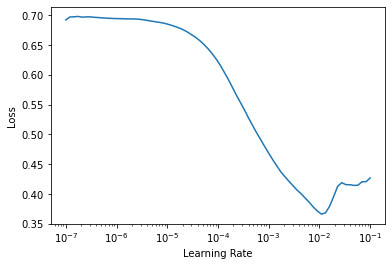

In [54]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [55]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.247370,0.393123,0.953830,0.343558,0.282116,0.309820,0.713047,00:16
1,0.141890,0.151331,0.968357,0.653631,0.294710,0.406250,0.824860,00:16
2,0.102818,0.111202,0.969189,0.660000,0.332494,0.442211,0.856364,00:16
3,0.082404,0.111632,0.969282,0.671958,0.319899,0.433447,0.852742,00:16


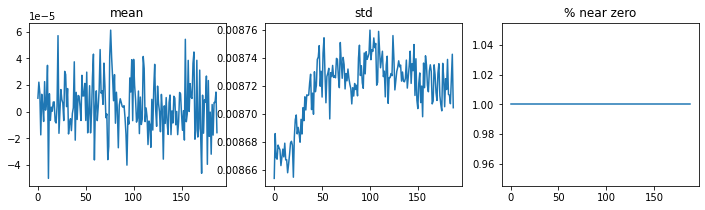

In [56]:
learn.activation_stats.plot_layer_stats(1)

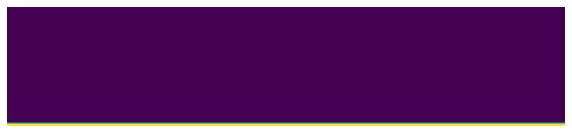

In [58]:
learn.activation_stats.color_dim(1)

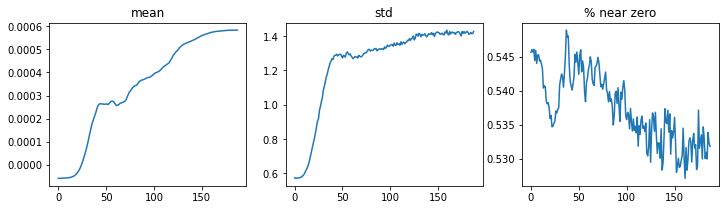

In [57]:
learn.activation_stats.plot_layer_stats(-2)

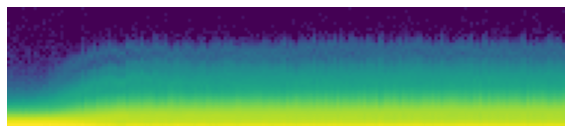

In [59]:
learn.activation_stats.color_dim(-2)

(6.309573450380412e-08, 5.754399353463668e-06)

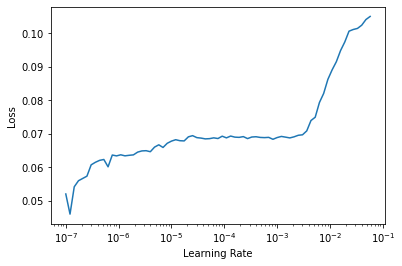

In [60]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep 

In [61]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.066997,0.111516,0.969097,0.688623,0.289673,0.407801,0.850253,00:16
1,0.066922,0.111131,0.970207,0.714286,0.314861,0.437063,0.850927,00:16
2,0.066701,0.111992,0.969652,0.704142,0.299748,0.420495,0.851029,00:16
3,0.066022,0.111923,0.969375,0.677419,0.317380,0.432247,0.851815,00:16


# Imbalance

## RandomUnderSampler without V*** features

In [210]:
from imblearn.under_sampling import RandomUnderSampler

In [211]:
rus = RandomUnderSampler(random_state=42)

In [212]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [213]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)

cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579507

In [214]:
assert (len(train_idx) + len(valid_idx) == len(train_ss))

In [215]:
train = train_ss.iloc[train_idx]
valid = train_ss.iloc[valid_idx]

In [216]:
assert (len(train) + len(valid) == len(train_ss))

In [217]:
train, train_target = rus.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

In [218]:
train['isFraud'] = train_target

In [219]:
train.shape, train_target.shape

((3442, 95), (3442,))

In [220]:
train.index, valid.index

(RangeIndex(start=0, stop=3442, step=1),
 Int64Index([571056, 538612, 557768, 526898, 497577, 502230, 560962, 558531,
             486709, 550868,
             ...
             488275, 567722, 488047, 563480, 502767, 511411, 588799, 556655,
             483712, 590071],
            dtype='int64', length=10697))

In [221]:
df_nn = pd.concat([train, valid])

In [222]:
assert (len(train) + len(valid) == len(df_nn))

In [223]:
df_nn.shape

(14139, 95)

In [224]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [225]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12578785

In [226]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [227]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [228]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((3442, 122), (10697, 122))

In [229]:
dls = to_nn.dataloaders(1024)

In [230]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [277]:
learn = tabular_learner(dls, metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [231]:
learn = tabular_learner(dls, [500, 250], metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.03019951581954956, 0.005248074419796467)

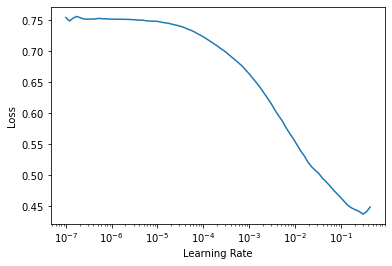

In [278]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [279]:
learn.fit_one_cycle(8, lr_steep, wd=0.1)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.693860,0.626824,0.965411,0.000000,0.000000,0.000000,0.682502,00:01
1,0.618264,0.648838,0.851360,0.110969,0.470270,0.179567,0.753589,00:01
2,0.534761,0.736544,0.303076,0.044607,0.937838,0.085164,0.761440,00:01
3,0.464453,0.815185,0.275778,0.043220,0.943243,0.082652,0.767344,00:01
4,0.410201,0.945613,0.229878,0.041812,0.970270,0.080170,0.765333,00:02
5,0.366725,1.040721,0.217538,0.041179,0.970270,0.079005,0.773956,00:02
6,0.330806,1.112946,0.203702,0.040595,0.972973,0.077939,0.778280,00:01
7,0.302733,1.159122,0.196223,0.040232,0.972973,0.077270,0.782410,00:02


/opt/anaconda3/envs/fastaiV2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


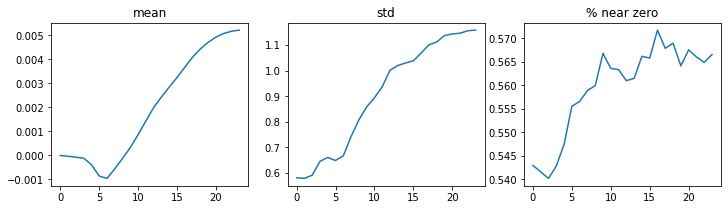

In [280]:
learn.activation_stats.plot_layer_stats(-2)

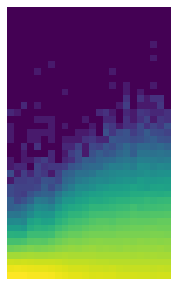

In [281]:
learn.activation_stats.color_dim(-2)

(0.0013182567432522773, 0.005248074419796467)

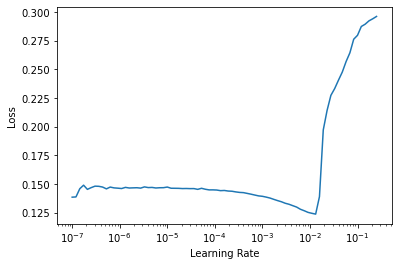

In [283]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [284]:
learn.fit_one_cycle(4, lr_steep, wd=0.1)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.144870,1.282844,0.165560,0.038810,0.972973,0.074642,0.783547,00:01
1,0.138291,1.609724,0.142750,0.038009,0.978378,0.073176,0.784697,00:01
2,0.124450,1.869816,0.121903,0.036950,0.972973,0.071195,0.783200,00:01
3,0.112054,1.865767,0.131345,0.037241,0.970270,0.071728,0.787137,00:01


(0.001096478197723627, 0.009120108559727669)

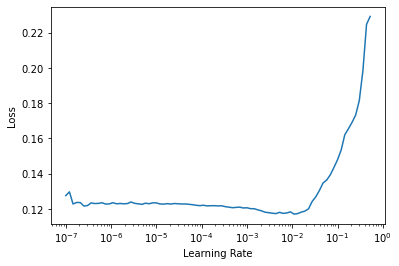

In [253]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [192]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.148749,0.662074,0.582406,0.066455,0.848649,0.123258,0.797638,00:01
1,0.140396,0.697902,0.514724,0.059726,0.883784,0.111891,0.797818,00:02
2,0.129573,0.708971,0.520052,0.060517,0.886486,0.113299,0.800537,00:02
3,0.120062,0.708463,0.533140,0.061457,0.875676,0.114853,0.803659,00:02


In [193]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.095859,0.736087,0.517341,0.059871,0.881081,0.112124,0.804696,00:02
1,0.090533,0.826133,0.462373,0.055216,0.902703,0.104066,0.803238,00:02
2,0.082498,0.834870,0.490231,0.058230,0.905405,0.109423,0.807334,00:02
3,0.076608,0.828288,0.518089,0.060929,0.897297,0.114109,0.809252,00:02


In [194]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.058901,0.847004,0.535010,0.061858,0.878378,0.115576,0.807550,00:02
1,0.055463,0.874809,0.564364,0.065789,0.878378,0.122411,0.807958,00:02
2,0.051228,0.893896,0.592316,0.069100,0.864865,0.127974,0.810938,00:02
3,0.047717,0.903653,0.613817,0.072322,0.859459,0.133417,0.809750,00:02


(0.0005248074419796466, 0.0030199517495930195)

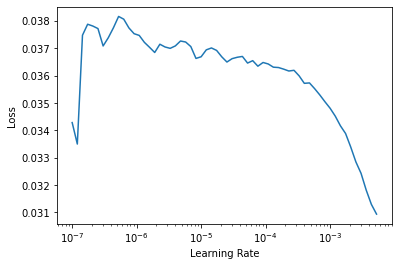

In [195]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [120]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.021618,1.424576,0.550996,0.063251,0.867568,0.117906,0.799764,00:01
1,0.023682,0.890764,0.765729,0.102086,0.740541,0.179437,0.816352,00:01
2,0.030473,1.370933,0.629242,0.071088,0.805405,0.130644,0.777963,00:01
3,0.032706,1.348405,0.656633,0.074246,0.778378,0.135561,0.788298,00:01


(0.0005248074419796466, 0.0020892962347716093)

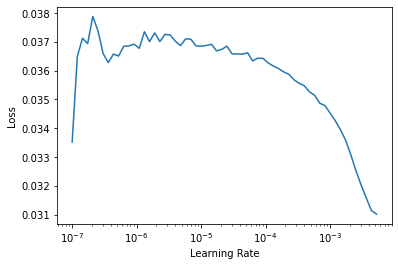

In [196]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [198]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.034611,1.154839,0.633168,0.071601,0.802703,0.131474,0.789079,00:01
1,0.034253,1.116667,0.695616,0.081739,0.762162,0.147644,0.799974,00:01
2,0.032919,1.363455,0.649808,0.073737,0.789189,0.134873,0.790957,00:01
3,0.028927,1.333484,0.676545,0.078099,0.772973,0.141865,0.794943,00:01


(0.00036307806149125097, 0.001737800776027143)

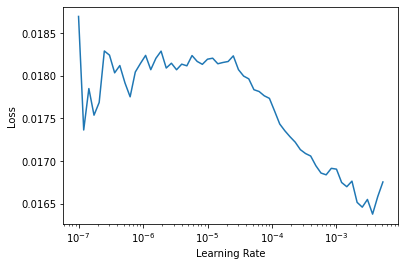

In [199]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [200]:
learn.fit_one_cycle(4, 2e-4, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.019082,1.336904,0.689820,0.080296,0.762162,0.145286,0.795412,00:01
1,0.018275,1.322580,0.705431,0.082558,0.743243,0.148608,0.796249,00:01
2,0.017402,1.350479,0.706179,0.082254,0.737838,0.148008,0.794515,00:01
3,0.016704,1.370244,0.707301,0.082552,0.737838,0.148491,0.793633,00:01


In [201]:
learn.fit_one_cycle(4, 7e-5, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.014504,1.390593,0.707301,0.082552,0.737838,0.148491,0.793058,00:01
1,0.013853,1.399379,0.707582,0.082121,0.732432,0.147684,0.791921,00:01
2,0.013776,1.407031,0.707955,0.081967,0.729730,0.147380,0.791228,00:01
3,0.013762,1.417763,0.708049,0.081992,0.729730,0.147420,0.790877,00:01


In [285]:
interp = ClassificationInterpretation.from_learner(learn)

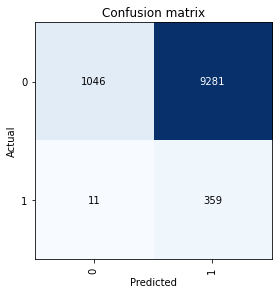

In [286]:
interp.plot_confusion_matrix()

In [204]:
cm = interp.confusion_matrix()

In [205]:
sum(sum(cm))

10697

In [206]:
assert sum(sum(cm)) == len(valid)

In [207]:
valid['isFraud'].sum()

370

## RandomUnderSampler with V*** features

In [345]:
from imblearn.under_sampling import RandomUnderSampler

In [346]:
rus = RandomUnderSampler(random_state=42)

In [347]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)

In [348]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_s['TransactionDT'].max() - train_s['TransactionDT'].min())*0.8)

cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579507

In [349]:
assert (len(train_idx) + len(valid_idx) == len(train_s))

train = train_s.iloc[train_idx]
valid = train_s.iloc[valid_idx]

assert (len(train) + len(valid) == len(train_s))

In [350]:
train, train_target = rus.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

train['isFraud'] = train_target

train.shape, train_target.shape

((3442, 434), (3442,))

In [351]:
df_nn = pd.concat([train, valid])

assert (len(train) + len(valid) == len(df_nn))

df_nn.shape

(14139, 434)

In [352]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [353]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12578785

In [354]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
       'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125',
       'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
       'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149',
       'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
       'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181',
       'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189',
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
       'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205',
       'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
       'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221',
       'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
       'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
       'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
       'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261',
       'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269',
       'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
       'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293',
       'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
       'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317',
       'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339'] 
dep_var='isFraud'

In [355]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [356]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((3442, 800), (10697, 800))

In [357]:
dls = to_nn.dataloaders(1024)

In [358]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [368]:
learn = tabular_learner(dls, metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.006918309628963471, 0.0030199517495930195)

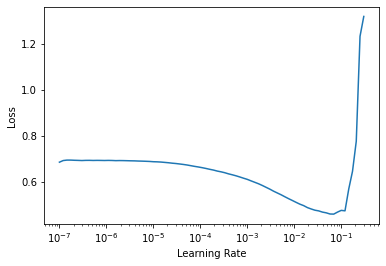

In [360]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [369]:
learn.fit_one_cycle(4, lr_steep, wd=1)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.656516,36.824425,0.506778,0.059130,0.889189,0.110886,0.803414,00:04
1,0.585598,115.712173,0.712536,0.085250,0.751351,0.153126,0.812597,00:04
2,0.520642,189.766922,0.769188,0.100190,0.710811,0.175626,0.816028,00:05
3,0.469841,270.963959,0.804899,0.111010,0.662162,0.190144,0.817758,00:05


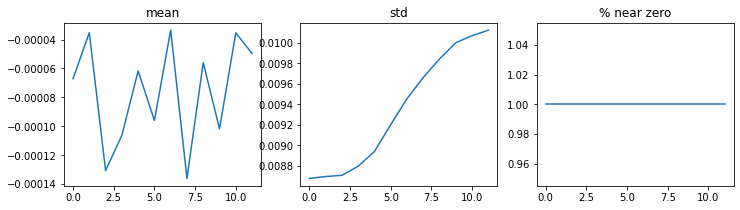

In [362]:
learn.activation_stats.plot_layer_stats(1)

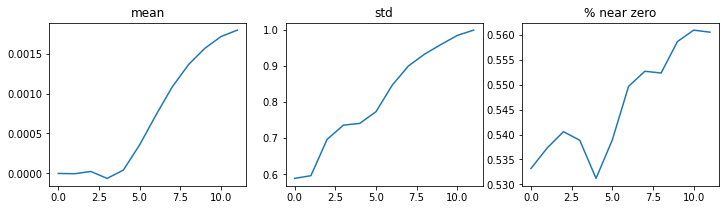

In [363]:
learn.activation_stats.plot_layer_stats(-2)

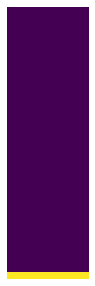

In [364]:
learn.activation_stats.color_dim(1)

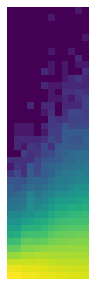

In [365]:
learn.activation_stats.color_dim(-2)

(0.0005248074419796466, 0.001737800776027143)

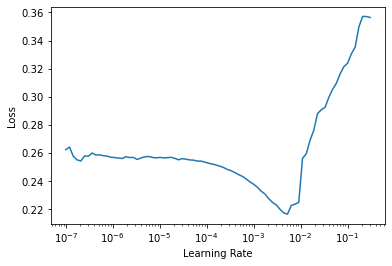

In [172]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [173]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.258553,0.643853,0.612300,0.563258,0.895317,0.691489,0.717871,00:00
1,0.239723,0.637914,0.612300,0.563040,0.898072,0.692144,0.728833,00:00
2,0.219287,0.636913,0.609626,0.561955,0.887052,0.688034,0.733047,00:00
3,0.200391,0.646205,0.610963,0.561856,0.900826,0.692063,0.734256,00:00


## RandomOverSampler without V*** features

In [304]:
from imblearn.over_sampling import RandomOverSampler

In [305]:
ros = RandomOverSampler(random_state=42)

In [306]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [307]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)

cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579507

In [308]:
assert (len(train_idx) + len(valid_idx) == len(train_ss))

train = train_ss.iloc[train_idx]
valid = train_ss.iloc[valid_idx]

assert (len(train) + len(valid) == len(train_ss))

In [309]:
train, train_target = ros.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

train['isFraud'] = train_target

train.shape, train_target.shape

((93272, 95), (93272,))

In [310]:
df_nn = pd.concat([train, valid])

assert (len(train) + len(valid) == len(df_nn))

df_nn.shape

(103969, 95)

In [311]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [312]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579507

In [313]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'

In [314]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [315]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((93272, 122), (10697, 122))

In [316]:
dls = to_nn.dataloaders(1024)

In [317]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [318]:
learn = tabular_learner(dls, metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.014454397559165954, 0.002511886414140463)

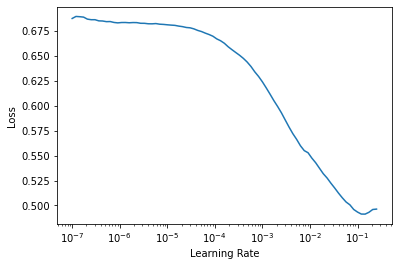

In [319]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [320]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.245073,0.240063,0.911097,0.183206,0.454054,0.261072,0.804083,00:31
1,0.094821,0.234945,0.956156,0.360563,0.345946,0.353103,0.831379,00:37
2,0.032494,0.285595,0.955875,0.326531,0.259459,0.289157,0.809014,00:36
3,0.011035,0.293642,0.958119,0.353383,0.254054,0.295597,0.814451,00:36


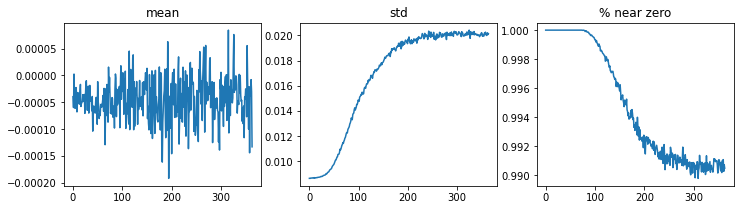

In [321]:
learn.activation_stats.plot_layer_stats(1)

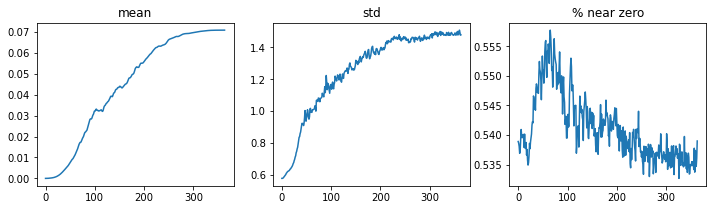

In [322]:
learn.activation_stats.plot_layer_stats(-2)

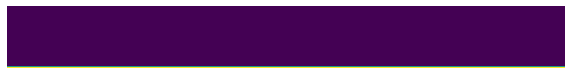

In [323]:
learn.activation_stats.color_dim(1)

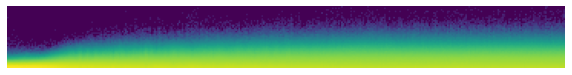

In [324]:
learn.activation_stats.color_dim(-2)

(3.6307807022240014e-06, 6.309573450380412e-07)

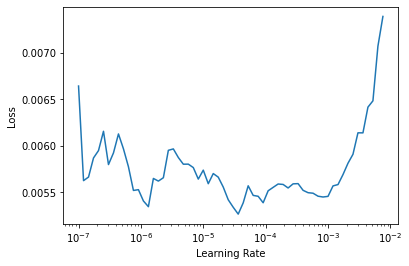

In [325]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [332]:
learn.fit_one_cycle(4, 5e-6)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.005528,0.293647,0.958119,0.351145,0.248649,0.291139,0.814114,00:30
1,0.005345,0.293586,0.958493,0.359848,0.256757,0.299685,0.814579,00:33
2,0.005277,0.292976,0.958493,0.360902,0.259459,0.301887,0.815500,00:36
3,0.005115,0.293870,0.958680,0.362595,0.256757,0.300633,0.815369,00:36


## RandomOverSampler with V*** features

In [377]:
from imblearn.over_sampling import RandomOverSampler

In [378]:
ros = RandomOverSampler(random_state=42)

In [379]:
train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)

In [380]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_s['TransactionDT'].max() - train_s['TransactionDT'].min())*0.8)

cond = train_s['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579507

In [381]:
assert (len(train_idx) + len(valid_idx) == len(train_s))

train = train_s.iloc[train_idx]
valid = train_s.iloc[valid_idx]

assert (len(train) + len(valid) == len(train_s))

In [382]:
train, train_target = ros.fit_resample(train.drop(['isFraud'], axis=1), train['isFraud'])

train['isFraud'] = train_target

train.shape, train_target.shape

((93272, 434), (93272,))

In [383]:
df_nn = pd.concat([train, valid])

assert (len(train) + len(valid) == len(df_nn))

df_nn.shape

(103969, 434)

In [384]:
df_nn['isFraud'] = df_nn['isFraud'].astype('category')

In [385]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((df_nn['TransactionDT'].max() - df_nn['TransactionDT'].min())*0.8)

cond = df_nn['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))
cut_off

12579507

In [386]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38']
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74',
       'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',
       'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92',
       'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101',
       'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125',
       'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141',
       'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149',
       'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157',
       'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165',
       'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173',
       'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181',
       'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189',
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197',
       'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205',
       'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213',
       'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221',
       'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237',
       'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245',
       'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253',
       'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261',
       'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269',
       'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
       'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293',
       'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309',
       'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317',
       'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339'] 
dep_var='isFraud'

In [387]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn, procs_nn, cat, cont,
                     splits=splits, y_names=dep_var)
to_nn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [388]:
to_nn.train.xs.shape, to_nn.valid.xs.shape

((93272, 800), (10697, 800))

In [389]:
dls = to_nn.dataloaders(1024)

In [390]:
F1_score = F1Score()
recall = Recall()
precision = Precision()
roc_score = RocAucBinary()
metrics = [accuracy, precision, recall, F1_score, roc_score]

In [391]:
learn = tabular_learner(dls, metrics=metrics,
                        cbs=ActivationStats(with_hist=True))
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.006918309628963471, 0.0020892962347716093)

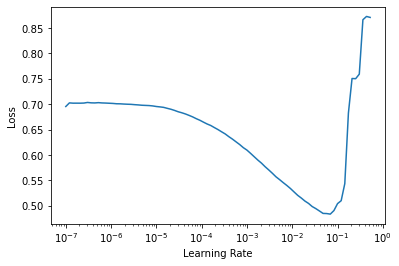

In [392]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [393]:
learn.fit_one_cycle(4, lr_steep, wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.262564,0.181661,0.938114,0.273292,0.475676,0.347140,0.838002,02:04
1,0.114396,0.282475,0.893896,0.168257,0.524324,0.254760,0.799517,02:14
2,0.042211,0.206074,0.953632,0.352113,0.405405,0.376884,0.802502,02:24
3,0.014761,0.245901,0.962419,0.451515,0.402703,0.425714,0.825729,02:22


## Class weighting NN without V*** features

In [407]:
df = pd.read_csv(path/'train_s.csv', index_col=[0])

In [408]:
class_count_df = df.groupby('isFraud').count()['TransactionID']

n_0, n_1 = class_count_df[0], class_count_df[1]

w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)

In [409]:
to_nn = (path/'to_nn.pkl').load()

In [412]:
dls = to_nn.dataloaders(1024)

weights = [w_0, w_1]
class_weights=torch.FloatTensor(weights).cuda()
loss_func = CrossEntropyLossFlat(weight=class_weights)

learn = tabular_learner(dls, layers=[500, 250], loss_func=loss_func, metrics=metrics)
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.0033113110810518267, 0.0006918309954926372)

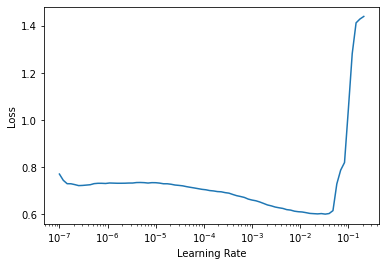

In [413]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [414]:
learn.fit_one_cycle(4, 1e-3 , wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.551992,0.610342,0.732074,0.084277,0.683784,0.150059,0.770860,00:13
1,0.438037,0.562923,0.733009,0.087865,0.716216,0.156527,0.791054,00:15
2,0.325018,0.632818,0.820043,0.119804,0.662162,0.202899,0.818343,00:16
3,0.238657,0.677338,0.855847,0.141809,0.627027,0.231306,0.812684,00:16


## Class weighting NN with V*** features 

In [326]:
df = pd.read_csv(path/'train_s.csv', index_col=[0])

In [327]:
class_count_df = df.groupby('isFraud').count()['TransactionID']

n_0, n_1 = class_count_df[0], class_count_df[1]

w_0 = (n_0 + n_1) / (2.0 * n_0)
w_1 = (n_0 + n_1) / (2.0 * n_1)

In [328]:
to_nn = (path/'to_nn_full.pkl').load()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data/to_nn_full.pkl'

In [85]:
dls = to_nn.dataloaders(1024)

weights = [w_0, w_1]
class_weights=torch.FloatTensor(weights).cuda()
loss_func = CrossEntropyLossFlat(weight=class_weights)

learn = tabular_learner(dls, layers=[500, 250], loss_func=loss_func, metrics=metrics)
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

(0.002290867641568184, 0.17378008365631104)

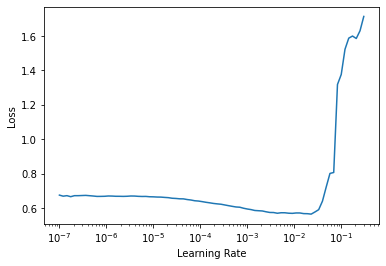

In [86]:
lr_min, lr_steep = learn.lr_find()
lr_min, lr_steep

In [87]:
learn.fit_one_cycle(4, 1e-3 , wd=0.01)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.503012,0.654526,0.856403,0.150212,0.624685,0.242188,0.828217,00:08
1,0.410471,0.549829,0.903127,0.210854,0.596977,0.311637,0.845451,00:08
2,0.317116,0.646505,0.844097,0.142619,0.647355,0.233743,0.830388,00:08
3,0.246206,0.723487,0.863249,0.156825,0.622166,0.250507,0.829358,00:08
